In [1]:
#installing nessesary packages
install.packages("rpart")
install.packages("rpart.plot")
install.packages("caTools")
install.packages("ggplot2")
install.packages("caret")
install.packages("dplyr")
install.packages("corrplot")

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message in install.packages("rpart.plot"):
“installation of package ‘rpart.plot’ had non-zero exit status”
Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/avind/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [2]:
library(caTools)
library(rpart)
library(ggplot2)
library(dplyr)
library(caret)
library(corrplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

corrplot 0.92 loaded



In [3]:
#just to getting nessasary data after pre processing
original_data <- read.csv("./dataset.csv", header = TRUE)
show(original_data)



     Age Attrition    BusinessTravel DailyRate             Department
1     41       Yes     Travel_Rarely      1102                  Sales
2     49        No Travel_Frequently       279 Research & Development
3     37       Yes     Travel_Rarely      1373 Research & Development
4     33        No Travel_Frequently      1392 Research & Development
5     27        No     Travel_Rarely       591 Research & Development
6     32        No Travel_Frequently      1005 Research & Development
7     59        No     Travel_Rarely      1324 Research & Development
8     30        No     Travel_Rarely      1358 Research & Development
9     38        No Travel_Frequently       216 Research & Development
10    36        No     Travel_Rarely      1299 Research & Development
11    35        No     Travel_Rarely       809 Research & Development
12    29        No     Travel_Rarely       153 Research & Development
13    31        No     Travel_Rarely       670 Research & Development
14    34        No  

In [4]:
# Removing obvious useless columns
original_data$EmployeeNumber <- NULL
original_data$StandardHours <- NULL
original_data$Over18 <- NULL
original_data$EmployeeCount <- NULL

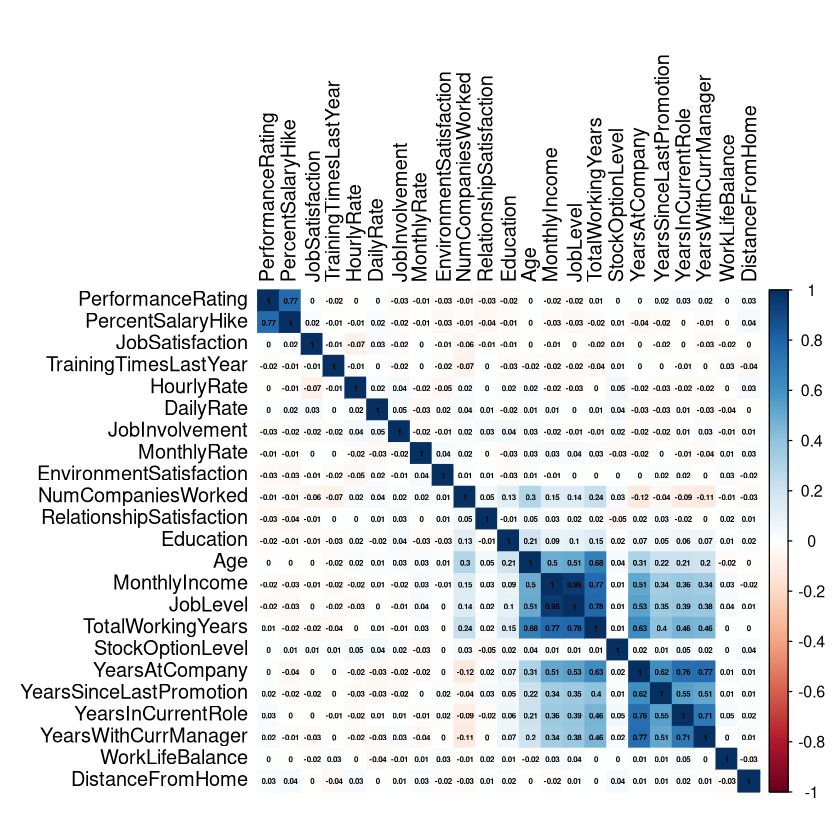

In [5]:
# to create the heat map so can get idea of corelation between the features

corr_dataset <- original_data

numeric_data <- corr_dataset %>%
  select_if(is.numeric)

cor_matrix <- cor(numeric_data)

par(mar = c(2, 2, 2, 2))  # Adjust the margins if needed
corrplot(cor_matrix, method = "color", order="AOE", addCoef.col = "black", tl.col = "black", tl.srt = 90, number.cex = 0.4)

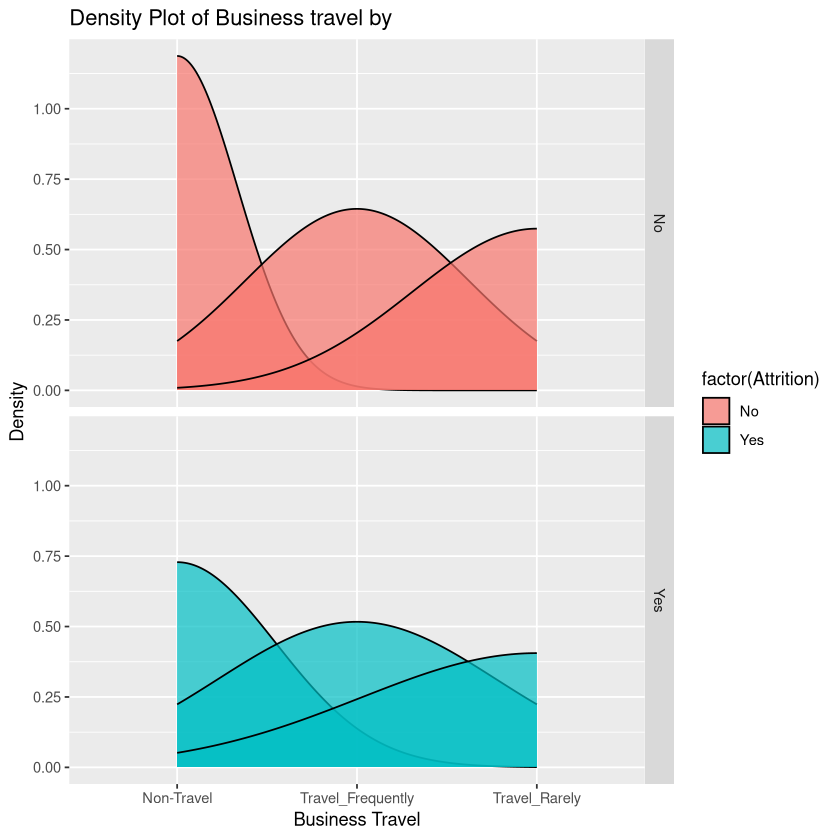

In [6]:
#As above the correlation heat map shows, we can remove the highly correlated features to avoid overfitting and also can plot some graphs to get idea of the data to make sure it is important or not

ggplot(data = original_data, aes(x = BusinessTravel, fill = factor(Attrition))) +
  geom_density(alpha = 0.7) +
  facet_grid(Attrition ~ .) +
  labs(title = "Density Plot of Business travel by",
       x = "Business Travel",
       y = "Density")

# As you can see varying from the business travel the attrition is same for all yes or no so we can remove this feature

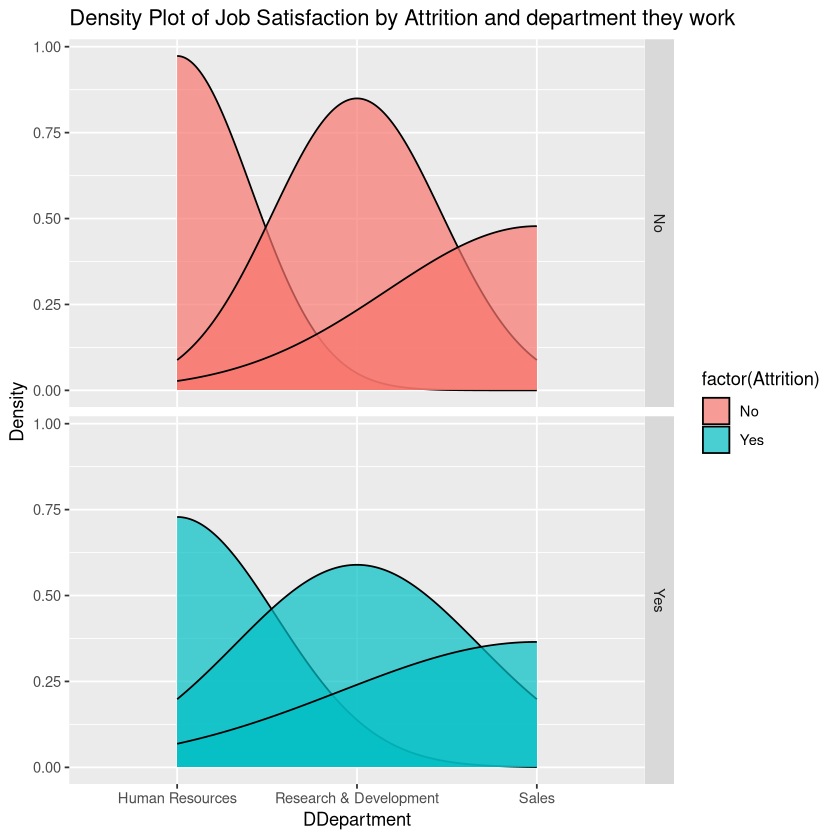

In [7]:
# and same for this plot

ggplot(data = original_data, aes(x = Department, fill = factor(Attrition))) +
  geom_density(alpha = 0.7) +
  facet_grid(Attrition ~ .) +
  labs(title = "Density Plot of Job Satisfaction by Attrition and department they work",
       x = "DDepartment",
       y = "Density")


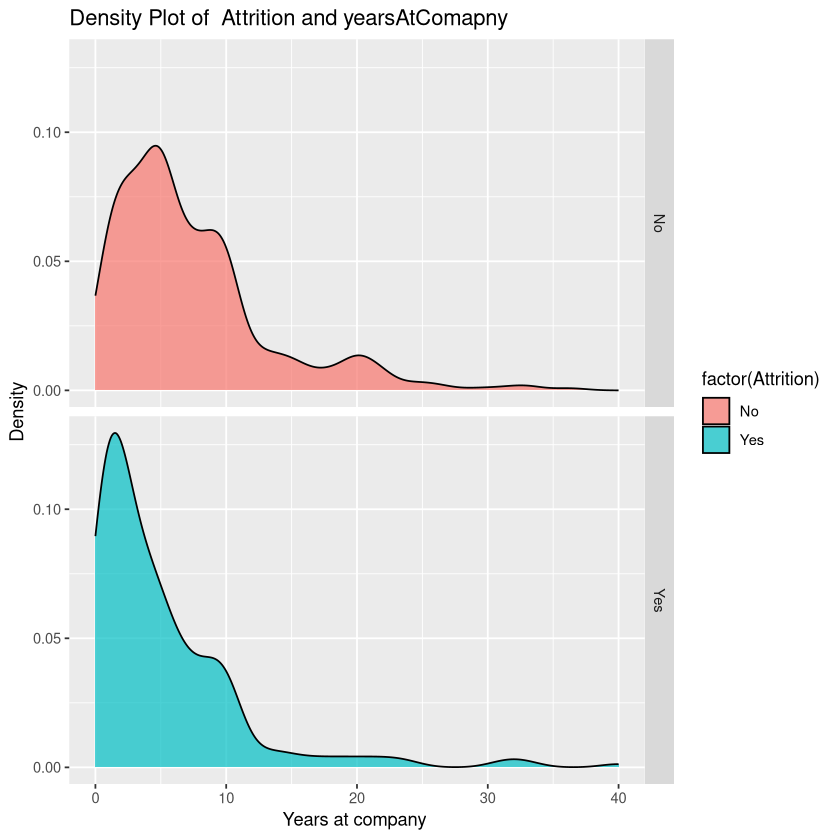

In [8]:
ggplot(data = original_data, aes(x = YearsAtCompany, fill = factor(Attrition))) +
  geom_density(alpha = 0.7) +
  facet_grid(Attrition ~ .) +
  labs(title = "Density Plot of  Attrition and yearsAtComapny",
       x = "Years at company ",
       y = "Density")


In [9]:
#and also a scatter plot to identfy all the features which are not important, when we scatter plot we can see how the data is distributed and we can remove the features which are not important

ggplot(data = original_data, aes(x = YearsAtCompany, y = EmployeeNumber, color = Attrition)) +
  geom_point() +
  labs(title = "Scatter Plot of Daily Rate by Employee Number",
       x = "years at company",
       y = "employee number") +
  scale_color_manual(values = c("No" = "green", "Yes" = "red"))

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'EmployeeNumber' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error

In [10]:
#data to be processed
data_set <- read.csv("./dataset.csv", header = TRUE)

#cleaning dataset according to the heat map and plotted graphs

columns_to_remove <- c("Over18",
                       "EmployeeCount",
                       "BusinessTravel",
                       "EmployeeNumber" ,
                       "StandardHours" ,
                       "YearsWithCurrManager" ,
                       "Department",
                       "Age",
                       "YearsAtCompany",
                       "YearsSinceLastPromotion",
                       "YearsInCurrentRole",
                       "JobLevel",
                       "YearsInCurrentRole",
                       "NumCompaniesWorked",
                       "JobInvolvement"
                       )


data_set <- data_set[, -which(names(data_set) %in% columns_to_remove)]





In [11]:
# Initialize a vector to store accuracies
accuracies <- numeric(10)

In [12]:
#process of desicion tree model for 10 times

for (i in 1:10) {
  
  # Set seed for each iteration (optional, depends on your use case)
  set.seed(120+ i*i)
  
  split_ratio <- sample.split(original_data, SplitRatio = 0.7)
  
  train_data <-  subset(original_data, split_ratio=="TRUE")
  test_data <- subset(original_data, split_ratio=="FALSE")
  
  
  head(test_data)
  
  decision_tree <- rpart(Attrition ~ ., data = train_data, method = "class")
  
  predictions <- predict(decision_tree, newdata = test_data, type = "class")
  
  confusion_matrix <- table(predictions, test_data$Attrition)
  
  dim(confusion_matrix)
  
  accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
  
  # Store the accuracy in the vector
  accuracies[i] <- accuracy
  
  print(paste("Accuracy for iteration", i, ":", accuracy))
}


[1] "Accuracy for iteration 1 : 0.856540084388186"
[1] "Accuracy for iteration 2 : 0.829113924050633"
[1] "Accuracy for iteration 3 : 0.841437632135307"
[1] "Accuracy for iteration 4 : 0.847780126849894"
[1] "Accuracy for iteration 5 : 0.834381551362683"
[1] "Accuracy for iteration 6 : 0.851694915254237"
[1] "Accuracy for iteration 7 : 0.842436974789916"
[1] "Accuracy for iteration 8 : 0.808016877637131"
[1] "Accuracy for iteration 9 : 0.854430379746835"
[1] "Accuracy for iteration 10 : 0.863157894736842"


In [13]:
#to print the accuracy of the model for 10 times

average_accuracy <- mean(accuracies)

print(paste("Average Accuracy:", average_accuracy))



[1] "Average Accuracy: 0.842899036095166"
